# Testing a large number of iterations for GRASP

In this notebook, a few instances will be solver with GRASP using a *large* number of iterations.

The results will be plotted to visualize at which iteration the objective function stops improving. A value of $\beta = 4$ will be used for all tests.

In [113]:
from models import Instance

instance_100 = Instance.read(f'..\\data\\anpcp{100}_{0}.tsp')

In [114]:
from models.solver import Solver

solvers_100 = [
    Solver(instance_100, 5, 2),
    Solver(instance_100, 5, 3),
    Solver(instance_100, 10, 2),
    Solver(instance_100, 10, 3)
]

In [4]:
for solver in solvers_100:
    solver.grasp(2000, 0.4)

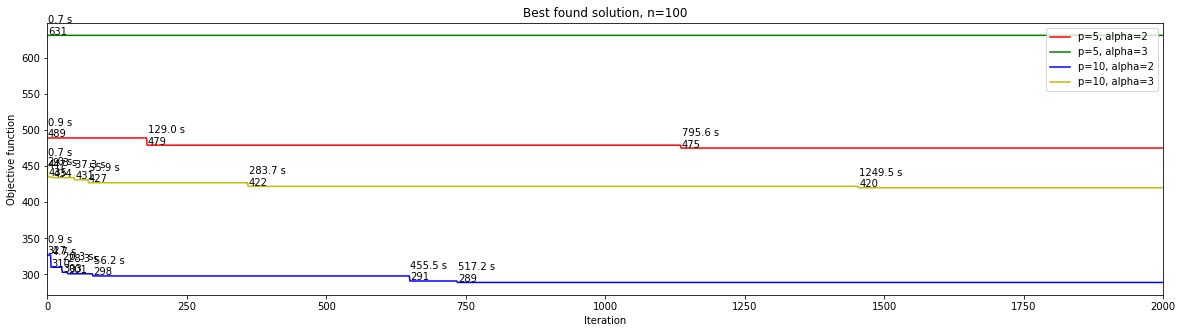

In [111]:
from typing import Sequence

import matplotlib.pyplot as plt

%matplotlib inline

def plot_grasp_of(solvers: Sequence[Solver], colors: Sequence[str]) -> None:
    plt.figure(figsize=(20, 5))

    for solver, color in zip(solvers, colors):
        of_values = list()

        min_of = 1000
        total_time = 0
        for i, solution in enumerate(solver.history):
            total_time += solution.time

            if solution.objective_function < min_of:
                min_of = solution.objective_function
                
                plt.annotate(
                    f'{total_time:.1f} s\n{min_of}',
                    (i, min_of),
                    xytext=(i + 1, min_of + 1)
                )
            of_values.append(min_of)

        plt.plot(
            range(len(of_values)),
            of_values,
            color,
            label=f'p={solver.p}, alpha={solver.alpha}'
        )

    plt.title(f'Best found solution, n={solvers[0].instance.n}')
    plt.ylabel('Objective function')
    plt.xlabel('Iteration')
    plt.xlim(0, len(solvers[0].history))
    plt.legend()
    plt.show()

plot_grasp_of(solvers_100, ('r', 'g', 'b', 'y'))

In [68]:
instance300 = Instance.random(300)
instance300.write('..\\data')

solver300 = Solver(instance300, 20, 2)
solver300.grasp(1000, 0.4)

Solver.Solution(indexes={6, 7, 73, 138, 205, 81, 18, 19, 148, 290, 37, 294, 172, 187, 242, 182, 55, 123, 125, 191}, objective_function=222, max_alphath=182)

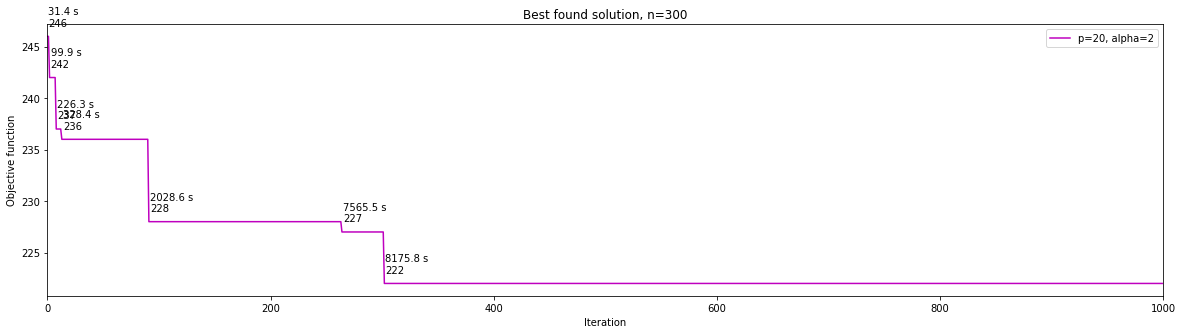

In [139]:
plot_grasp_of([solver300], ['m'])